In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# 1. 데이터 
datasets = (load_digits())

x = pd.DataFrame(datasets["data"])
y = pd.DataFrame(datasets["target"])

IndentationError: unexpected indent (2628236405.py, line 13)

In [ ]:
print(x.shape,y.shape) # (1797, 64) (1797, 1)
# 64개의 컬럼 = 8x8 짜리 이미지임

# y의 클래스 값 분류 + 불균형확인
print(np.unique(y)) # [0 1 2 3 4 5 6 7 8 9]
# 불균형확인
print(np.unique(y,return_counts=True)) # [0 1 2]


y = to_categorical(y)

(1797, 64) (1797, 1)
[0 1 2 3 4 5 6 7 8 9]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


<Figure size 640x480 with 0 Axes>

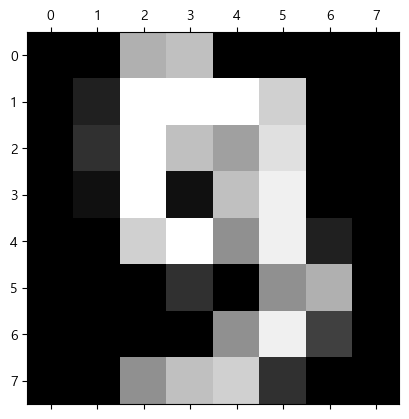

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(datasets.images[9])
plt.show()

In [ ]:
# print(x.info())
# print(x.describe())
# 데이터 분리
x_train, x_test, y_train,y_test = train_test_split(x,y,
                                                   train_size=0.8,
                                                   shuffle = True,
                                                   #  stratify 는 데이터 불균형을 해결해줌
                                                   stratify=y
                                                   #  random_state=21
                                                   )
# print(x.columns)
# y 의 첫번째 칼럼을 원핫 인코딩 변환
# y_train[0] = tf.one_hot(y_train[0],3)
# y_test[0] = tf.one_hot(y_test[0],3)
print(y_train[:5])
print("shape : ",x_train.shape)
print("shape : ",y_train.shape)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
shape :  (1437, 64)
shape :  (1437, 10)


In [ ]:
model = Sequential([
    Dense(60,activation="relu",input_shape=(64,)),
    Dense(40,activation="relu") ,
    Dense(40,activation="relu") ,
    Dense(30,activation="relu") ,
    Dense(30,activation="relu") ,
    Dense(20,activation="relu") ,
    # 다중분류모델의 활성화 함수는 softmax 입니다
    Dense(10,activation="softmax")
])

In [ ]:
# 이진분류는 마지막 활성함수는 sigmoid + loss 는 바이너리 크로스 엔트로피 
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
monitor='val_loss',
min_delta=0.01, patience=5, 
verbose=1, 
mode='min')

# 훈련값이 int 형이기 때문에 sparse 를 사용합니다.
model.compile(loss="categorical_crossentropy"
              ,optimizer="adam"
              ,metrics=["accuracy"]
              )

hist = model.fit(x_train, y_train, epochs=100, batch_size=32, 
                 validation_split=0.2,
                 callbacks = [early_stopping])

# metrics 에 accuracy 사용가능


Epoch 1/100
36/36 [==============================] - 1s 9ms/step - loss: 2.1098 - accuracy: 0.2332 - val_loss: 1.5977 - val_accuracy: 0.5347
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 1.2079 - accuracy: 0.6223 - val_loss: 0.7669 - val_accuracy: 0.7708
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.8172 - val_loss: 0.4313 - val_accuracy: 0.8924
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.8956 - val_loss: 0.2967 - val_accuracy: 0.9062
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.2434 - accuracy: 0.9130 - val_loss: 0.2304 - val_accuracy: 0.9201
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1471 - accuracy: 0.9565 - val_loss: 0.1823 - val_accuracy: 0.9340
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1103 - accuracy: 0.9721 - val_loss: 0.2062 - val_accuracy: 0.9410
Epoch 8/100
3

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

print("loss:",loss,"\nacc :" ,accuracy)


12/12 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9694
loss: 0.12566447257995605 
acc : 0.9694444537162781


In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(x_test)

# predict 의 값은 총 3개가 나오는데 softmax 특성상 sum 의 값은 1이 됨
print(y_predict[:5])

# argmax 는 x 를 최대값으로 만들어주는 입력을 구하는함수
y_predict = np.argmax(y_predict,axis=1)
# y_predict = to_categorical(y_predict,3)
print(y_predict[:5])
# y_test 를 원핫 인코딩 해제 해야함
y_test = np.argmax(y_test,axis=1)
print(y_test[:5])

print
print("========================================")
acc = accuracy_score(y_test,y_predict)
print(acc)

[[4.93061272e-08 3.03483766e-11 3.01326976e-12 3.82628095e-05
  7.63478951e-08 9.58649798e-06 6.53688909e-11 9.99947309e-01
  7.72002835e-08 4.69179849e-06]
 [9.99999762e-01 1.60442853e-13 1.65799957e-14 2.86571819e-13
  1.46068447e-13 6.75484178e-14 1.91406646e-09 8.99938684e-08
  1.27746381e-11 9.41344851e-08]
 [7.80818787e-09 2.89343029e-11 1.79618109e-11 3.03238921e-04
  2.04877046e-10 2.58181387e-07 1.45795964e-09 1.83840657e-05
  5.96054576e-07 9.99677539e-01]
 [3.49503557e-06 1.06556705e-04 3.42057511e-08 2.88512902e-09
  9.99668241e-01 3.69014538e-06 1.47784976e-05 1.34317952e-05
  1.48890453e-04 4.07707448e-05]
 [5.42282180e-07 1.30580695e-04 1.33388101e-08 1.05286736e-05
  1.90104056e-05 8.04634970e-10 2.03906366e-05 4.20788780e-07
  9.99753416e-01 6.50884540e-05]]
[7 0 9 4 8]


AxisError: axis 1 is out of bounds for array of dimension 1

<Figure size 640x480 with 0 Axes>

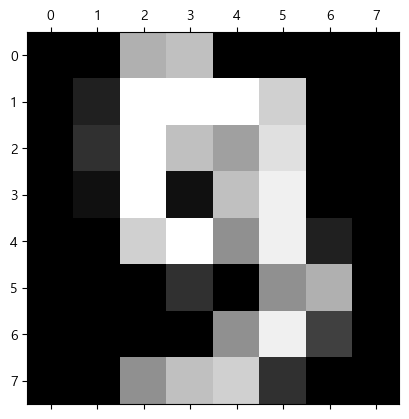

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(datasets.images[9])
plt.show()


In [ ]:
a=0.1
b=0.2

a+b

0.30000000000000004